New DG Food Agro are a multinational exporter of various grains from India since nearly 130 years. But their main product of 
exporting since early 1980s has been Wheat. They export wheat to countries like America, Afghanistan, Australia etc. They 
started seeing varying exports of sales year on year for various countries. The reason that was theorized by them had a lot of 
natural causes like floods, country growth, population explosion etc. Now they need to decide which countries fall in the same 
range of export and which don’t. They also need to know which countries export is low and can be improved and which countries 
are performing very well across the years. The data provided right now is across 18 years. What they need is a repeatable 
solution which won’t get affected no matter how much data is added across time and that they should be able to explain the data 
across years in less number of variables

Objective: Our objective is to cluster the countries based on various sales data provided to us across years. We have to apply
an unsupervised learning technique like K means or Hierarchical clustering so as to get the final solution. But before that we 
have to bring the exports (in tons) of all countries down to same scale across years. Plus, as this solution needs to be 
repeatable we will have to do PCA so as to get the principal components which explain max variance

# importing necessary libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading data_sets from the csv file
df = pd.read_csv(r"C:\Users\Komal\Downloads\Project_Data_2.csv", index_col=0, decimal=",")

In [3]:
#5rows and columns of the dataset
df.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
Sales of Wheat in tons,,,,,,,,,,,,,,,,,,
Afghanistan,436.0,429.0,422.0,415.0,407.0,397.0,397,387,374,373,346,326,304,308,283.0,267.0,251.0,238.0
Albania,42.0,40.0,41.0,42.0,42.0,43.0,42,44,43,42,40,34,32,32,29.0,29.0,26.0,22.0
Algeria,45.0,44.0,44.0,43.0,43.0,42.0,43,44,45,46,48,49,50,51,52.0,53.0,55.0,56.0
American Samoa,42.0,14.0,4.0,18.0,17.0,22.0,0,25,12,8,8,6,5,6,9.0,11.0,9.0,5.0
Andorra,39.0,37.0,35.0,33.0,32.0,30.0,28,23,24,22,20,20,21,18,19.0,18.0,17.0,19.0


# changing headers that is index as country and columns as year for better analysis
it makes easier to understand the content of each variable

In [4]:

df.index.names = ['country']
df.columns.names = ['year']
df.head(10)

year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
country,,,,,,,,,,,,,,,,,,
Afghanistan,436.0,429.0,422.0,415.0,407.0,397.0,397,387,374,373,346,326,304,308,283.0,267.0,251.0,238.0
Albania,42.0,40.0,41.0,42.0,42.0,43.0,42,44,43,42,40,34,32,32,29.0,29.0,26.0,22.0
Algeria,45.0,44.0,44.0,43.0,43.0,42.0,43,44,45,46,48,49,50,51,52.0,53.0,55.0,56.0
American Samoa,42.0,14.0,4.0,18.0,17.0,22.0,0,25,12,8,8,6,5,6,9.0,11.0,9.0,5.0
Andorra,39.0,37.0,35.0,33.0,32.0,30.0,28,23,24,22,20,20,21,18,19.0,18.0,17.0,19.0
Angola,514.0,514.0,513.0,512.0,510.0,508.0,512,363,414,384,530,335,307,281,318.0,331.0,302.0,294.0
Anguilla,38.0,38.0,37.0,37.0,36.0,35.0,35,36,36,36,35,35,35,35,35.0,34.0,34.0,34.0
Antigua and Barbuda,16.0,15.0,15.0,14.0,13.0,12.0,12,11,11,9,8,9,7,9,8.0,8.0,9.0,9.0
Argentina,96.0,91.0,86.0,82.0,78.0,74.0,71,67,63,58,52,51,42,41,39.0,39.0,37.0,35.0


In [5]:
#last 5 rows
df.tail()

year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
country,,,,,,,,,,,,,,,,,,
Wallis et Futuna,126.0,352.0,64.0,174.0,172.0,93.0,123,213,107,105,103,13,275,147,63.0,57.0,60.0,25.0
West Bank and Gaza,55.0,54.0,54.0,52.0,52.0,50.0,49,46,44,42,40,39,37,36,35.0,33.0,32.0,31.0
Yemen,265.0,261.0,263.0,253.0,250.0,244.0,233,207,194,175,164,154,149,146,138.0,137.0,135.0,130.0
Zambia,436.0,456.0,494.0,526.0,556.0,585.0,602,626,634,657,658,680,517,478,468.0,453.0,422.0,387.0
Zimbabwe,409.0,417.0,415.0,419.0,426.0,439.0,453,481,392,430,479,523,571,632,652.0,680.0,699.0,714.0


In [6]:
#fetching information of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207 entries, Afghanistan to Zimbabwe
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1990    207 non-null    float64
 1   1991    207 non-null    float64
 2   1992    207 non-null    float64
 3   1993    207 non-null    float64
 4   1994    207 non-null    float64
 5   1995    207 non-null    float64
 6   1996    207 non-null    int64  
 7   1997    207 non-null    int64  
 8   1998    207 non-null    int64  
 9   1999    207 non-null    int64  
 10  2000    207 non-null    int64  
 11  2001    207 non-null    int64  
 12  2002    207 non-null    int64  
 13  2003    207 non-null    int64  
 14  2004    207 non-null    float64
 15  2005    207 non-null    float64
 16  2006    207 non-null    float64
 17  2007    207 non-null    float64
dtypes: float64(10), int64(8)
memory usage: 30.7+ KB


In [7]:
#converting column year as int 
df = df.astype(int)

In [8]:
#checking data types
df.dtypes

year
1990    int32
1991    int32
1992    int32
1993    int32
1994    int32
1995    int32
1996    int32
1997    int32
1998    int32
1999    int32
2000    int32
2001    int32
2002    int32
2003    int32
2004    int32
2005    int32
2006    int32
2007    int32
dtype: object

In [9]:
#knowing the no. of rows and columns
df.shape

(207, 18)

In [10]:
#applied describe function for statistical analysis
df.describe()

year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
count,207.000000,207.000000,207.000000,207.00000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,184.845411,184.483092,185.748792,184.21256,181.898551,181.275362,178.898551,180.975845,178.120773,180.473430,177.521739,177.797101,179.516908,176.405797,168.932367,166.135266,163.743961,161.927536
std,206.973652,204.150498,206.963917,202.41830,199.542083,195.862361,193.786752,192.272421,188.843079,195.062942,199.438504,205.102644,205.321624,210.272545,202.074112,202.517028,201.271124,202.224137
min,0.000000,1.000000,1.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.500000,37.500000,37.000000,36.00000,32.500000,31.000000,31.500000,29.500000,29.000000,28.000000,21.500000,22.500000,24.500000,20.500000,19.500000,18.000000,17.500000,18.500000
50%,95.000000,91.000000,89.000000,86.00000,89.000000,91.000000,88.000000,93.000000,90.000000,90.000000,85.000000,80.000000,79.000000,71.000000,69.000000,66.000000,65.000000,60.000000
75%,284.500000,310.000000,317.000000,312.00000,308.500000,304.500000,306.500000,320.500000,323.000000,345.500000,319.500000,309.000000,306.000000,297.500000,287.000000,280.000000,265.500000,260.000000
max,928.000000,905.000000,986.000000,966.00000,947.000000,928.000000,910.000000,853.000000,777.000000,770.000000,761.000000,832.000000,932.000000,960.000000,830.000000,866.000000,902.000000,941.000000


In [11]:
#checking for null or missing vales in the data set
df.isnull().sum()

year
1990    0
1991    0
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
dtype: int64

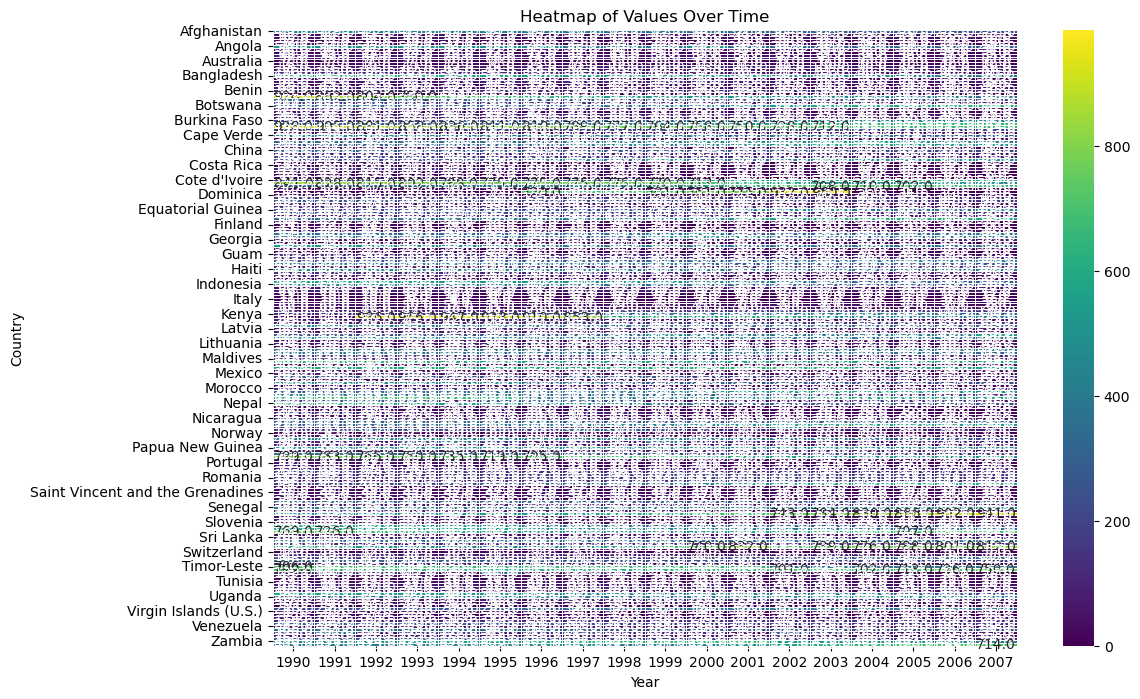

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(df, cmap='viridis', annot=True, fmt=".1f", linewidths=.5)
plt.xlabel('Year')
plt.ylabel('Country')
plt.title('Heatmap of Values Over Time')
plt.show()

In [12]:
#calculating the total sales per country and then sorting the results in ascending order.
total_sales_per_country = df.sum(axis=0).sort_values(ascending=False)
print(total_sales_per_country)

year
1992    38450
1990    38263
1991    38188
1993    38132
1994    37653
1995    37524
1997    37462
1999    37358
2002    37160
1996    37032
1998    36871
2001    36804
2000    36747
2003    36516
2004    34969
2005    34390
2006    33895
2007    33519
dtype: int64


# bargraph that shows yearly sales from high to low

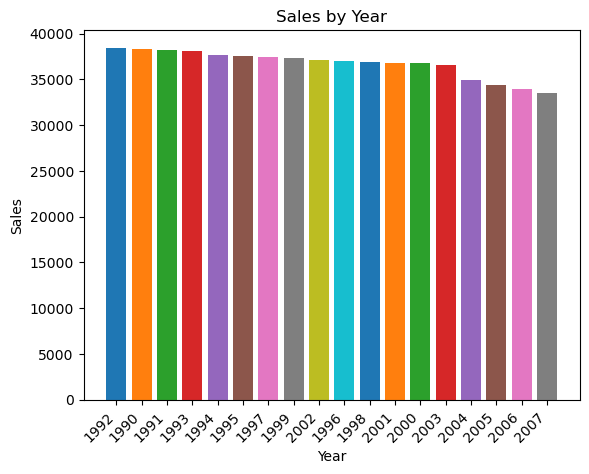

In [13]:
sorted_sales = total_sales_per_country.sort_values (ascending= False)
for year, sales in sorted_sales.items():
    plt.bar(year, sales)
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Sales by Year')
plt.xticks(rotation=45, ha='right')
plt.show()


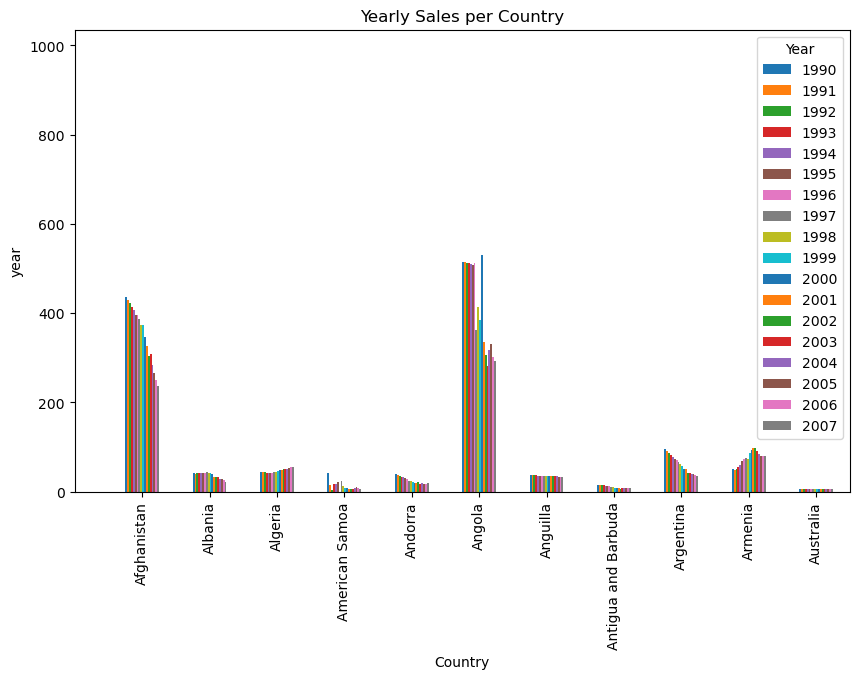

In [92]:
df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Country')
plt.ylabel('year')
plt.title('Yearly Sales per Country')
plt.legend(title='Year')
plt.xticks(rotation=90)
plt.xlim(-1,10.5)
plt.show()

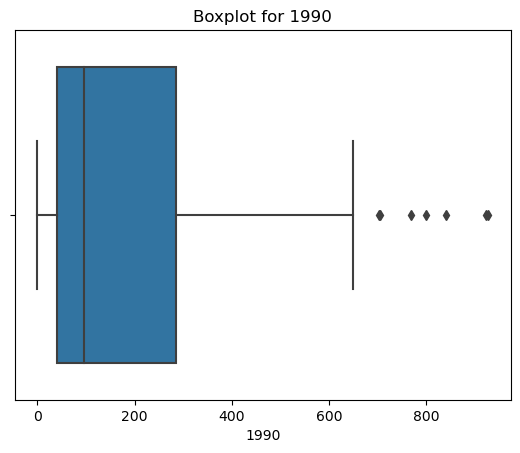

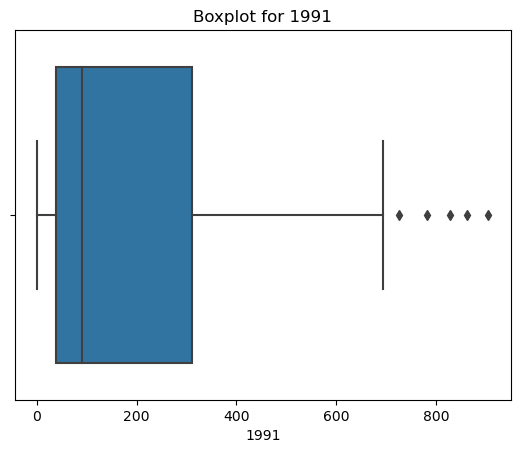

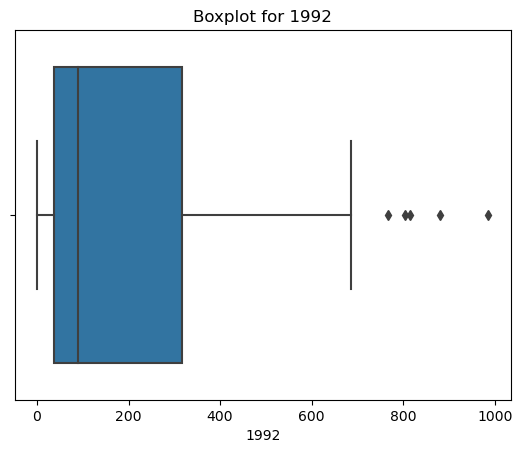

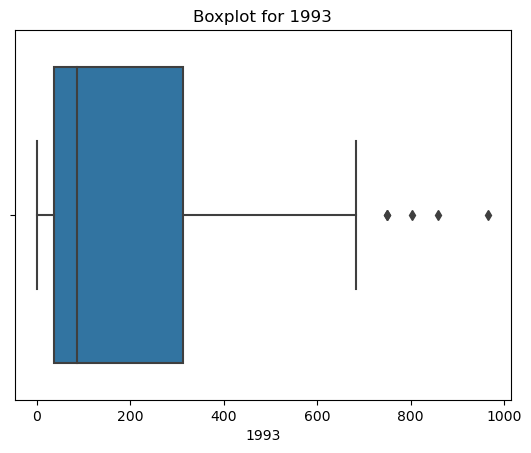

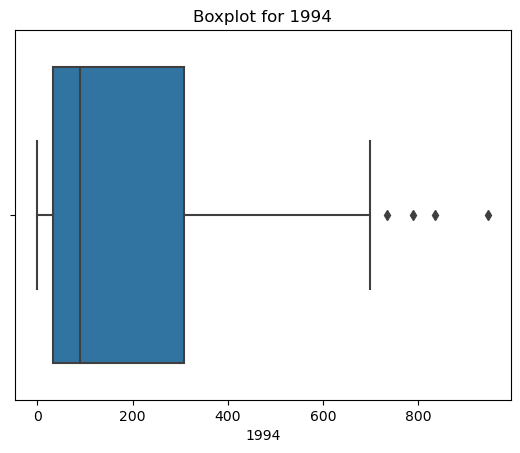

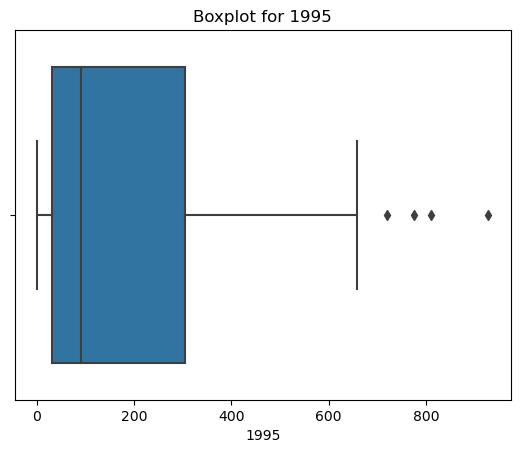

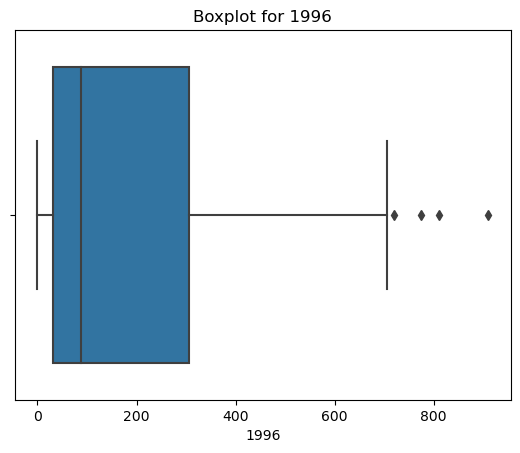

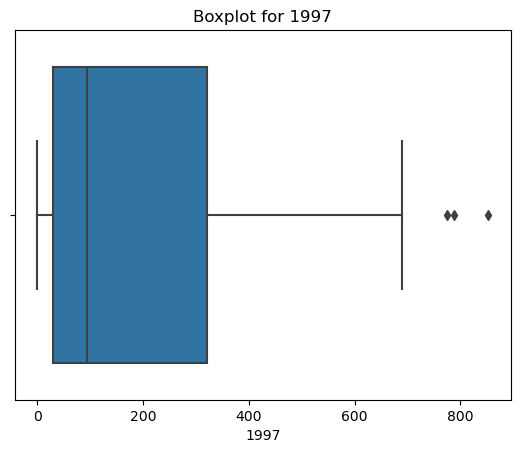

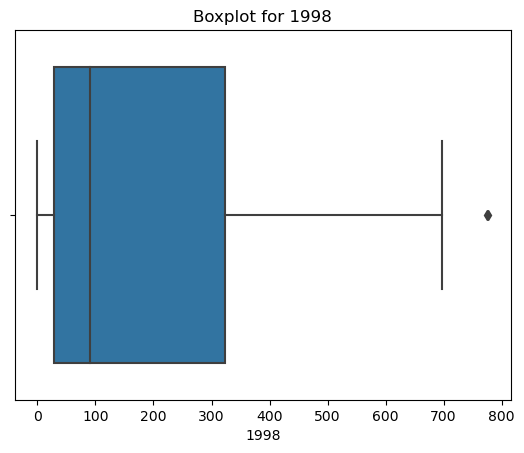

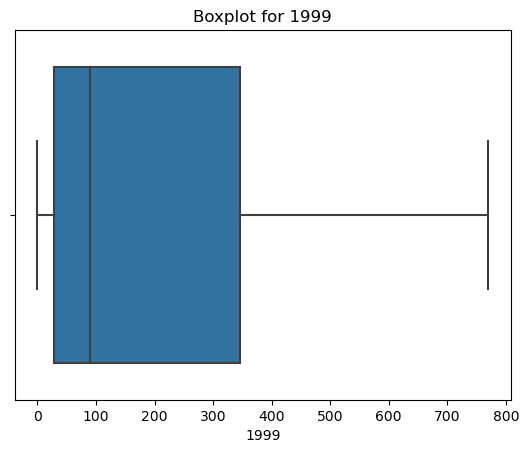

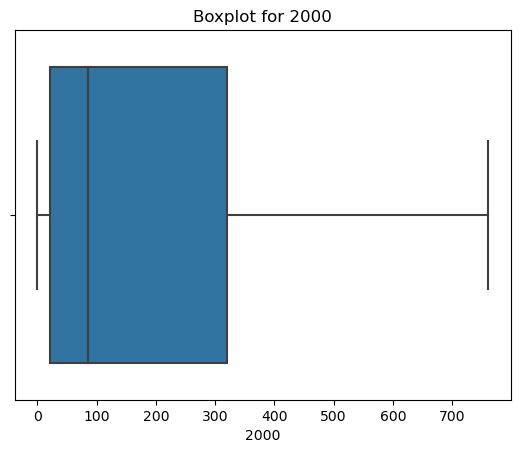

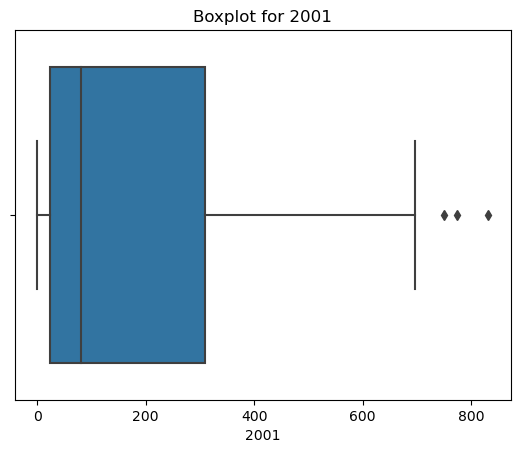

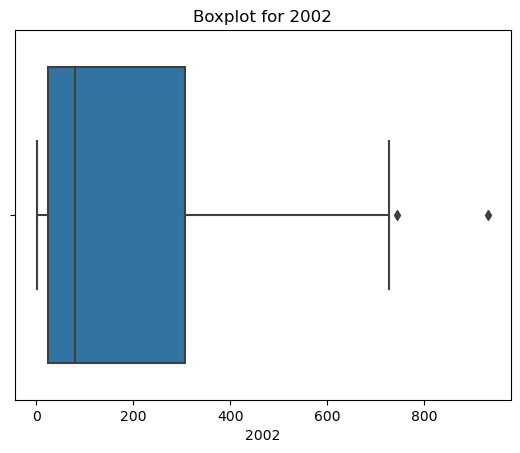

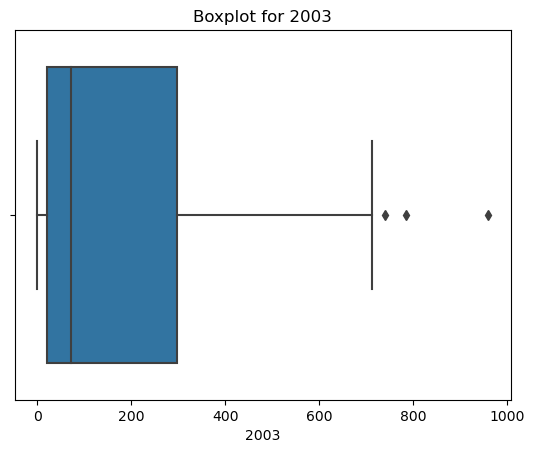

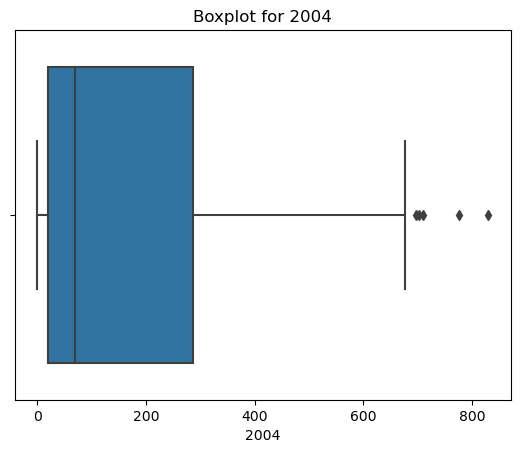

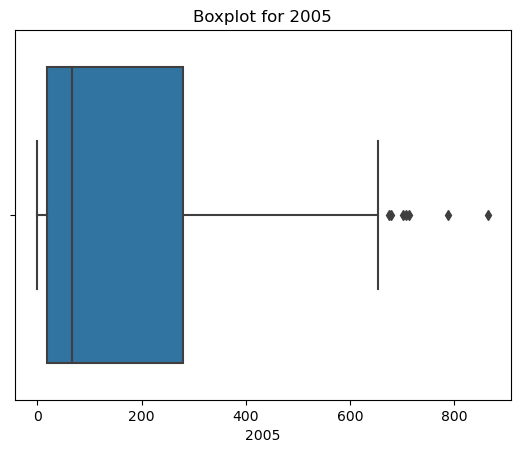

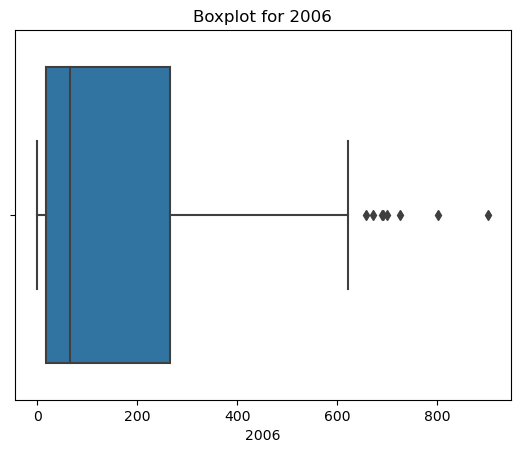

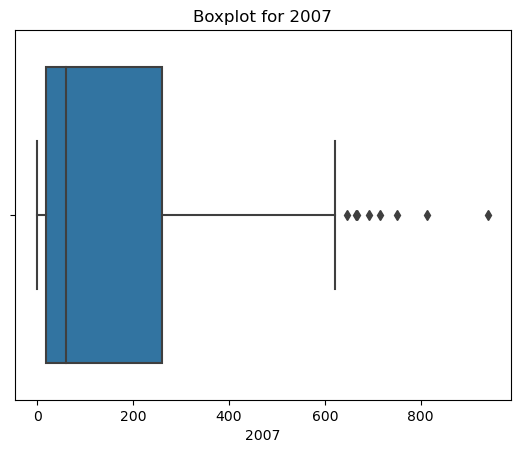

In [13]:
years = df.select_dtypes(include='int32').columns
for column in years:
    sns.boxplot(x=column, data=df, orient='v')
    plt.title(f'Boxplot for {column}')
    plt.show()

In [94]:
#import libraries for performing PCA 

In [14]:
from sklearn.decomposition import PCA

In [15]:
#creating new data from original data set
decomposition_data = df.iloc[:,0:]
decomposition_data

year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
country,,,,,,,,,,,,,,,,,,
Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238
Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22
Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56
American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5
Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wallis et Futuna,126,352,64,174,172,93,123,213,107,105,103,13,275,147,63,57,60,25
West Bank and Gaza,55,54,54,52,52,50,49,46,44,42,40,39,37,36,35,33,32,31
Yemen,265,261,263,253,250,244,233,207,194,175,164,154,149,146,138,137,135,130


In [16]:
#createing an instance of the PCA with a specified paramete:- 0.95; parameter represents the desired explained variance here we 
# need 95% of the variance in the data after performing PCA

model_pca = PCA(.95)

pca_data = model_pca.fit(decomposition_data).transform(decomposition_data)

In [17]:
#printing the explained variance ratios of each principal component
print("Variance Ratio\n")
print(model_pca.explained_variance_ratio_)

Variance Ratio

[0.89660067 0.06046413]


In [18]:
model_pca.n_components_

2

In [19]:
#createing a new DataFrame new_data using the data obtained after applying PCA
new_data = pd.DataFrame(pca_data, columns=["pca_1", "pca_2"])
new_data.index = df.index

In [20]:
new_data.head(8)

,pca_1,pca_2
country,,
Afghanistan,744.818064,-235.628249
Albania,-595.862229,6.103223
Algeria,-551.300260,45.945200
American Samoa,-700.697123,8.858311
Andorra,-645.420387,1.530868
Angola,998.913058,-340.210787
Anguilla,-601.389958,25.471891
Antigua and Barbuda,-706.560704,19.823258


identifing the "elbow" point, which is the point where the WCSS starts to decrease at a slower rate.. 

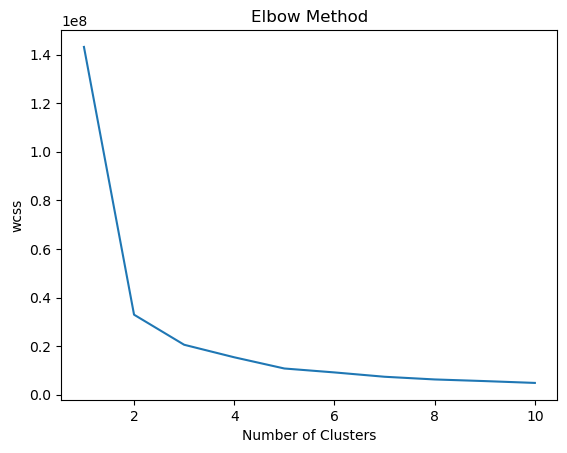

In [21]:
# elbow method to find number of clusers
from sklearn.cluster import KMeans
wcss = [] # wcss - within cluster squared sum of inertia

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=10)
    kmeans.fit(new_data)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("wcss")
plt.show()

In [22]:

kmeans = KMeans(n_clusters=3)

In [23]:
kmeans.fit(new_data)

KMeans(n_clusters=3)

In [24]:
kmeans.cluster_centers_

array([[-508.06118456,   -5.20824997],
       [ 722.29640477,  -27.52462347],
       [1618.31095183,   80.62625746]])

In [25]:
kmeans.labels_

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       2, 1, 0, 2, 0, 0, 0, 0, 1, 2, 2, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 2, 0, 1, 0, 0, 0, 0, 0, 1,
       2, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 1, 1, 2, 0, 0, 1, 0, 2, 0, 0,
       0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 2, 2])

In [26]:
new_data["cluster"] = kmeans.labels_

In [27]:
new_data.head(8)

,pca_1,pca_2,cluster
country,,,
Afghanistan,744.818064,-235.628249,1
Albania,-595.862229,6.103223,0
Algeria,-551.300260,45.945200,0
American Samoa,-700.697123,8.858311,0
Andorra,-645.420387,1.530868,0
Angola,998.913058,-340.210787,1
Anguilla,-601.389958,25.471891,0
Antigua and Barbuda,-706.560704,19.823258,0


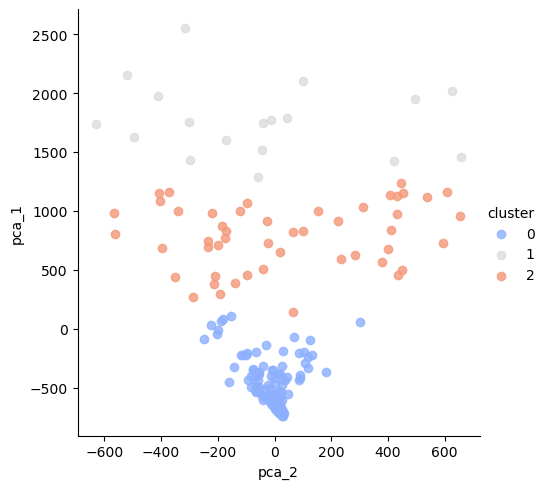

In [29]:
import seaborn as sns
sns.lmplot(x='pca_2', y='pca_1', data=new_data, hue='cluster', palette='coolwarm', aspect=1, fit_reg=False)


In [28]:
kmeans = KMeans(n_clusters=5)

In [29]:
kmeans.fit(new_data)

KMeans(n_clusters=5)

In [30]:
kmeans.cluster_centers_

array([[-5.46038028e+02,  4.90728829e-01,  1.05471187e-15],
       [ 9.37293766e+02,  4.25071716e+02,  1.38095238e+00],
       [ 1.62640452e+02, -1.20514341e+02,  5.00000000e-01],
       [ 8.98208185e+02, -2.09404911e+02,  1.04545455e+00],
       [ 1.84948983e+03, -1.31507679e+02,  2.00000000e+00]])

In [31]:
kmeans.labels_

array([3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0,
       4, 2, 0, 1, 0, 0, 0, 0, 1, 1, 4, 2, 0, 3, 0, 1, 1, 0, 2, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 4, 1, 0, 1, 0, 0, 2, 0, 0, 1, 2, 0, 1, 0, 0,
       0, 0, 3, 3, 0, 0, 3, 0, 0, 0, 0, 1, 3, 0, 3, 0, 0, 0, 3, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 4, 0, 0, 3, 0, 0, 1, 3, 0, 0, 0, 3, 3, 2,
       0, 4, 0, 4, 0, 0, 2, 0, 3, 0, 0, 1, 2, 4, 2, 3, 0, 0, 0, 0, 0, 2,
       1, 0, 2, 0, 0, 3, 0, 0, 3, 0, 2, 4, 0, 0, 0, 0, 0, 2, 2, 0, 1, 0,
       0, 0, 0, 0, 2, 0, 1, 0, 4, 0, 0, 0, 3, 3, 4, 0, 0, 3, 0, 4, 0, 0,
       0, 2, 2, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 2, 0, 2, 0, 0, 2, 4, 1])

In [32]:
new_data["cluster"] = kmeans.labels_

In [33]:
new_data.head(8)

,pca_1,pca_2,cluster
country,,,
Afghanistan,744.818064,-235.628249,3
Albania,-595.862229,6.103223,0
Algeria,-551.300260,45.945200,0
American Samoa,-700.697123,8.858311,0
Andorra,-645.420387,1.530868,0
Angola,998.913058,-340.210787,3
Anguilla,-601.389958,25.471891,0
Antigua and Barbuda,-706.560704,19.823258,0


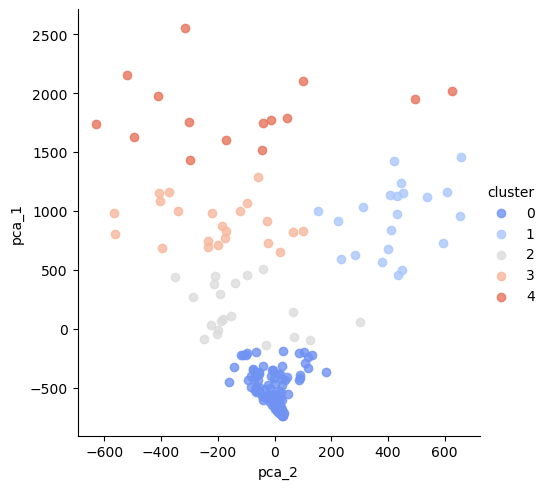

In [34]:
import seaborn as sns
sns.lmplot(x='pca_2', y='pca_1', data=new_data, hue='cluster', palette='coolwarm', aspect=1, fit_reg=False)

In [35]:
df["cluster"] = kmeans.labels_

In [36]:
df.sort_values(["cluster"])

year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,cluster
country,,,,,,,,,,,,,,,,,,,
United Arab Emirates,47,44,42,39,38,36,34,33,31,30,27,27,27,25,25,24,24,24,0
Kyrgyzstan,90,93,93,93,101,118,141,165,147,146,156,169,153,145,139,136,135,134,0
Latvia,56,57,59,63,75,91,77,89,92,95,91,89,85,78,72,66,61,55,0
Lebanon,64,64,63,62,62,59,64,54,50,37,35,30,26,24,22,21,23,23,0
Libyan Arab Jamahiriya,46,45,45,43,43,42,41,38,36,23,22,22,21,20,19,18,18,17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Philippines,799,783,766,750,735,719,705,689,669,649,600,578,561,542,534,520,505,500,4
Sierra Leone,465,479,492,504,517,534,525,565,602,636,675,696,743,784,830,866,902,941,4
Swaziland,629,590,527,477,448,441,460,504,556,647,740,832,693,739,776,788,801,812,4


In [37]:
#calculating the mean of each row and then storing the scaled values in another column
from sklearn.preprocessing import normalize

new_data['country_mean'] = pd.Series(df.mean(axis=1), index=new_data.index)
country_mean_max = new_data['country_mean'].max()
country_mean_min = new_data['country_mean'].min()
country_mean_scaled = (new_data.country_mean-country_mean_min) / country_mean_max
new_data['country_mean_scaled'] = pd.Series(
    country_mean_scaled, 
    index=new_data.index)
new_data.head()

,pca_1,pca_2,cluster,country_mean,country_mean_scaled
country,,,,,
Afghanistan,744.818064,-235.628249,3,334.894737,0.450745
Albania,-595.862229,6.103223,0,35.000000,0.044297
Algeria,-551.300260,45.945200,0,44.894737,0.057707
American Samoa,-700.697123,8.858311,0,11.631579,0.012626
Andorra,-645.420387,1.530868,0,23.947368,0.029317


In [38]:
#calculating the sum of each row and then storing the scaled values in another column

new_data['country_sum'] = pd.Series(df.sum(axis=1), index=new_data.index)
country_sum_max = new_data['country_sum'].max()
country_sum_min = new_data['country_sum'].min()
country_sum_scaled = (new_data.country_sum-country_sum_min) / country_sum_max
new_data['country_sum_scaled'] = pd.Series(
    country_sum_scaled, 
    index=new_data.index)

In [39]:
#calculating the change between the years 2007 and 1990 for each row
new_data['country_change'] = pd.Series(df['2007']-df['1990'], index=new_data.index)
country_change_max = new_data['country_change'].max()
country_change_min = new_data['country_change'].min()
country_change_scaled = (new_data.country_change - country_change_min) / country_change_max
new_data['country_change_scaled'] = pd.Series(
    country_change_scaled, 
    index=new_data.index)
new_data[['country_change','country_change_scaled']].head()

,country_change,country_change_scaled
country,,
Afghanistan,-198,0.762605
Albania,-20,1.136555
Algeria,11,1.201681
American Samoa,-37,1.100840
Andorra,-20,1.136555


In [40]:
new_data.sort_values(["country_sum", "cluster"],axis=0,ascending=False).head(10)
# Ten largest importer all belong to cluster 4

,pca_1,pca_2,cluster,country_mean,country_mean_scaled,country_sum,country_sum_scaled,country_change,country_change_scaled
country,,,,,,,,,
Cambodia,2548.403541,-315.422025,4,737.842105,0.996861,14019,0.996861,-264,0.623950
"Korea, Dem. Rep.",2156.298958,-519.272729,4,650.684211,0.878736,12363,0.878736,-400,0.338235
Togo,2101.962579,102.062919,4,637.631579,0.861046,12115,0.861046,48,1.279412
Sierra Leone,2021.425945,626.032250,4,618.947368,0.835723,11760,0.835723,476,2.178571
Philippines,1978.748565,-411.891513,4,610.947368,0.824881,11608,0.824881,-299,0.550420
Swaziland,1953.668719,493.465672,4,603.368421,0.814609,11464,0.814609,183,1.563025
South Africa,1790.638733,42.237876,4,568.000000,0.766674,10792,0.766674,-77,1.016807
Mauritania,1769.421893,-11.092092,4,563.263158,0.760254,10702,0.760254,-26,1.123950
Kiribati,1754.132246,-300.473167,4,559.263158,0.754833,10626,0.754833,422,2.065126


In [41]:
df.head(10)

year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,cluster
country,,,,,,,,,,,,,,,,,,,
Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238,3
Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22,0
Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56,0
American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5,0
Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19,0
Angola,514,514,513,512,510,508,512,363,414,384,530,335,307,281,318,331,302,294,3
Anguilla,38,38,37,37,36,35,35,36,36,36,35,35,35,35,35,34,34,34,0
Antigua and Barbuda,16,15,15,14,13,12,12,11,11,9,8,9,7,9,8,8,9,9,0
Argentina,96,91,86,82,78,74,71,67,63,58,52,51,42,41,39,39,37,35,0


In [42]:
consistent_country = df.iloc[:,0:18]
consistent_country.head()

year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
country,,,,,,,,,,,,,,,,,,
Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238
Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22
Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56
American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5
Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19


In [43]:
#row-wise variances calculated from the corresponding rows
consistent_country["var"]=consistent_country.var(axis=1)
df["var"]=consistent_country["var"]
df.head()

year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,cluster,var
country,,,,,,,,,,,,,,,,,,,,
Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238,3,4187.176471
Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22,0,47.820261
Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56,0,20.133987
American Samoa,42,14,4,18,17,22,0,25,12,8,8,6,5,6,9,11,9,5,0,97.741830
Andorra,39,37,35,33,32,30,28,23,24,22,20,20,21,18,19,18,17,19,0,52.918301


In [44]:
#sorted according to the low to high varience
df.sort_values(["var"],ascending=True).head(10)

year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,cluster,var
country,,,,,,,,,,,,,,,,,,,,
Grenada,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,0,0.055556
Australia,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,0,0.261438
Monaco,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,0,0.261438
Sweden,5,5,6,6,5,5,5,4,4,4,4,4,4,4,4,4,4,5,0,0.496732
Trinidad and Tobago,17,17,17,16,16,16,16,16,15,15,15,16,15,15,15,15,15,15,0,0.588235
Iceland,5,4,4,4,4,4,3,3,3,3,3,3,2,2,2,3,3,3,0,0.653595
United Kingdom,9,9,10,10,9,9,9,9,9,9,9,9,9,10,10,11,11,12,0,0.839869
New Zealand,10,10,9,9,10,11,10,10,11,11,11,10,10,10,10,9,8,7,0,1.124183
Canada,7,7,7,6,6,6,5,5,5,5,5,4,4,4,4,4,4,4,0,1.281046


In [45]:
new_data.sort_values(["pca_1","pca_2"]).head(10)

,pca_1,pca_2,cluster,country_mean,country_mean_scaled,country_sum,country_sum_scaled,country_change,country_change_scaled
country,,,,,,,,,
Monaco,-742.066075,28.969661,0,2.315789,0.000000,44,0.000000,-1,1.176471
Iceland,-738.776782,28.033214,0,3.052632,0.000999,58,0.000999,-2,1.174370
Sweden,-733.104852,28.676265,0,4.315789,0.002711,82,0.002711,0,1.178571
United States of America,-731.716722,24.703478,0,4.631579,0.003139,88,0.003139,-4,1.170168
Canada,-730.770261,26.338235,0,4.842105,0.003424,92,0.003424,-3,1.172269
Barbados,-730.074787,24.645666,0,5.000000,0.003638,95,0.003638,-5,1.168067
Norway,-728.174832,25.307993,0,5.421053,0.004209,103,0.004209,-4,1.170168
Australia,-725.099325,28.830119,0,6.105263,0.005136,116,0.005136,-1,1.176471
San Marino,-724.652857,25.545503,0,6.210526,0.005279,118,0.005279,-4,1.170168


In [46]:
#
df_cluster_1 = new_data[new_data['cluster'] == 1]

# Display the resulting DataFrame
print(df_cluster_1)


                                pca_1       pca_2  cluster  country_mean  \
country                                                                    
Botswana                  1152.262621  454.336349        1    424.631579   
Burkina Faso               566.485296  380.080599        1    293.894737   
Burundi                   1159.997790  606.223122        1    426.210526   
Central African Republic  1032.773193  311.901174        1    397.789474   
Chad                       974.902482  431.151730        1    385.105263   
Congo, Rep.                840.219246  411.786392        1    355.578947   
Cote d'Ivoire             1114.597990  538.103935        1    415.842105   
Congo, Dem. Rep.          1455.486877  658.641562        1    491.789474   
Djibouti                   728.586289  595.025983        1    327.736842   
Equatorial Guinea          502.593566  448.016271        1    279.157895   
Ethiopia                  1238.602813  446.071097        1    443.842105   
Guinea      

In [47]:
df_cluster_1 = new_data[new_data['cluster'] == 4]

# Display the resulting DataFrame
print(df_cluster_1)

                        pca_1       pca_2  cluster  country_mean  \
country                                                            
Bangladesh        1432.430165 -296.382548        4    488.526316   
Bhutan            1736.701258 -629.950572        4    557.000000   
Cambodia          2548.403541 -315.422025        4    737.842105   
Korea, Dem. Rep.  2156.298958 -519.272729        4    650.684211   
Kiribati          1754.132246 -300.473167        4    559.263158   
Mali              1747.660633  -40.499363        4    558.684211   
Mauritania        1769.421893  -11.092092        4    563.263158   
Namibia           1602.594252 -170.689004        4    526.000000   
Philippines       1978.748565 -411.891513        4    610.947368   
Sierra Leone      2021.425945  626.032250        4    618.947368   
South Africa      1790.638733   42.237876        4    568.000000   
Swaziland         1953.668719  493.465672        4    603.368421   
Timor-Leste       1628.870187 -495.388757       